### Sea Level Predictor

**Use Pandas to import the data from epa-sea-level.csv.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

In [ ]:
df = pd.read_csv('epa-sea-level.csv')
df.head(3)

,Year,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
0,1880,0.000000,-0.952756,0.952756,NaN
1,1881,0.220472,-0.732283,1.173228,NaN
2,1882,-0.440945,-1.346457,0.464567,NaN




---



**Use matplotlib to create a scatter plot using the Year column as the x-axis and the CSIRO Adjusted Sea Level column as the y-axis.**

Text(0, 0.5, 'CSIRO Adjusted Sea Level')

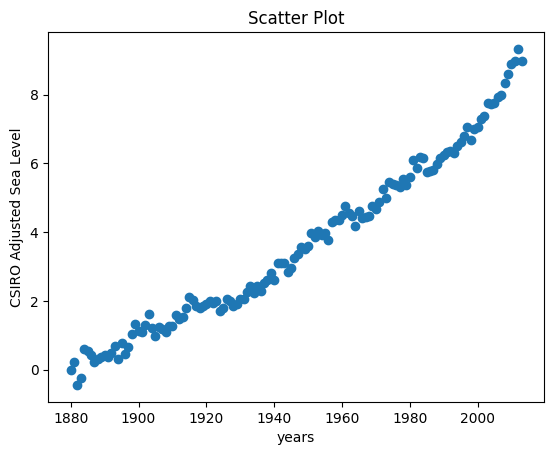

In [ ]:
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'])
plt.title('Scatter Plot')
plt.xlabel('years')
plt.ylabel('CSIRO Adjusted Sea Level')

In [ ]:
df['CSIRO Adjusted Sea Level']

,CSIRO Adjusted Sea Level
0,0.000000
1,0.220472
2,-0.440945
3,-0.232283
4,0.590551
...,...
129,8.586614
130,8.901575
131,8.964567
132,9.326772




---



**Use the linregress function from scipy.stats to get the slope and y-intercept of the line of best fit. Plot the line of best fit over the top of the scatter plot. Make the line go through the year 2050 to predict the sea level rise in 2050.**

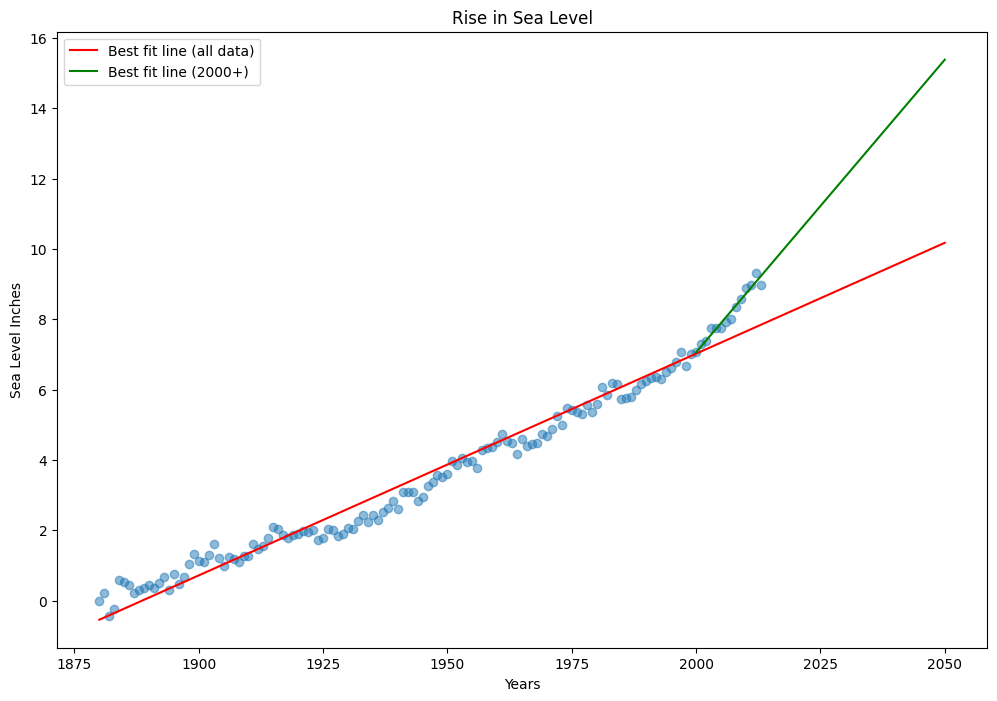

In [ ]:
plt.figure(figsize = (12, 8))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], alpha = 0.5)
plt.title('Rise in Sea Level')
plt.xlabel('Years')
plt.ylabel('Sea Level Inches')

slope, intercept, r, p, std_err = linregress(df['Year'], df['CSIRO Adjusted Sea Level'])


x_pred = np.arange(df['Year'].min(), 2051)
y_pred = intercept + slope * x_pred

plt.plot(x_pred, y_pred, 'r', label="Best fit line (all data)")


df_recent = df[df['Year'] >= 2000]

# Regression on filtered data
slope2, intercept2, r2, p2, std_err2 = linregress(df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])

# Predict until 2050
x_pred2 = np.arange(2000, 2051)
y_pred2 = intercept2 + slope2 * x_pred2

plt.plot(x_pred2, y_pred2, 'g', label="Best fit line (2000+)")

plt.legend()
plt.show()